In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppress warnings for cleaner notebook presentation
# import warnings
# warnings.filterwarnings('ignore')

#Set option to display all columns
pd.set_option('display.max_columns', None)

# Preprocessing customer data

In [2]:
df_customer =  pd.read_csv('customers_data.csv', delimiter='\t', on_bad_lines='skip')
df_customer.head(2)

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1


In [3]:
df_customer.duplicated().sum()

0

In [4]:
df_customer.shape

(5000, 17)

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer            5000 non-null   int64  
 1   accountid           5000 non-null   int64  
 2   workingbalance      5000 non-null   float64
 3   openingdate         5000 non-null   object 
 4   Restriciton Code    3532 non-null   object 
 5   address             4317 non-null   object 
 6   email_1             1586 non-null   object 
 7   account_status      5000 non-null   object 
 8   Maxtransdate        5000 non-null   object 
 9   product_group_desc  4931 non-null   object 
 10  customer_type       5000 non-null   object 
 11  region              5000 non-null   object 
 12  sector              5000 non-null   object 
 13  card_status         1873 non-null   object 
 14  onebank             5000 non-null   int64  
 15  onepay              5000 non-null   int64  
 16  ussd  

In [6]:
df_customer.isna().sum()

customer                 0
accountid                0
workingbalance           0
openingdate              0
Restriciton Code      1468
address                683
email_1               3414
account_status           0
Maxtransdate             0
product_group_desc      69
customer_type            0
region                   0
sector                   0
card_status           3127
onebank                  0
onepay                   0
ussd                     0
dtype: int64

In [7]:
# Drop the identified columns from both datasets
df_customer = df_customer.drop(columns=['address', 'email_1', 'Restriciton Code', 'region'])
df_customer.head(1)

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0


In [8]:
# Replace NaN values in 'card_status' with 'Unknown'
df_customer['card_status'].fillna('Unknown', inplace=True)
df_customer.head(1)

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,Unknown,0,0,0


In [9]:
# Find rows with NaN in 'product_group_desc'
nan_product_group_desc = df_customer[df_customer['product_group_desc'].isna()]
nan_product_group_desc

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd
228,10567957,12909123,0.00,2018-11-23,Active,2018-11-23,NaN,Individual Customer,GENERAL,Expired,0,0,0
379,16967057,15950106,0.00,2018-11-15,Active,2018-11-15,NaN,Individual Customer,GENERAL,Active,0,1,0
480,10684222,10032292,0.00,2017-01-27,Active,2017-01-27,NaN,MSME,OIL AND GAS,Unknown,0,0,0
489,17542571,10406237,-30735.24,2016-04-26,Dormant,2016-05-02,NaN,Corporate Customer,GENERAL,Unknown,0,0,0
684,10656219,15857892,-43568.95,2016-04-26,Dormant,2016-05-02,NaN,Corporate Customer,GENERAL COMMERCE,Unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,11637042,10282276,-235787.26,2016-04-26,Dormant,2016-05-02,NaN,Individual Customer,GENERAL,Unknown,0,0,0
4847,17044811,16852926,0.00,2016-04-06,Dormant,2021-03-09,NaN,Enterprise Customer,FINANCE AND INSURANCE,Unknown,0,0,0
4850,15477675,13434867,-19284.71,2020-01-27,Dormant,2020-03-10,NaN,Individual Customer,GENERAL,Unknown,0,0,0
4901,17298392,12942028,0.00,2020-06-08,Active,2020-06-08,NaN,Individual Customer,GENERAL,Active,1,1,0


In [10]:
# Drop rows with NaN in 'product_group_desc'
df_customer = df_customer.dropna(subset=['product_group_desc'])
df_customer

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,Unknown,0,0,0
1,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,0,0,1
2,17261366,15599591,3328.29,2016-09-22,Dormant,2020-10-14,Savings Accounts Group,Individual Customer,GENERAL,Unknown,0,0,0
3,14006532,17841524,2110.85,2021-01-21,Active,2022-03-08,Current Accounts Group,Individual Customer,GENERAL,Unknown,0,0,0
4,19087216,11994865,88.01,2016-06-15,Dormant,2020-10-20,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,Unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18588052,11067455,2154.13,2011-08-02,Dormant,2020-10-20,Savings Accounts Group,Individual Customer,GENERAL,Active,0,0,0
4996,17147719,19709088,746.68,2017-10-24,Active,2022-03-10,Savings Accounts Group,Individual Customer,GENERAL,Active,1,1,0
4997,16658290,14043745,26069.59,2014-06-23,Active,2022-01-05,Savings Accounts Group,Individual Customer,GENERAL,Unknown,0,0,0
4998,13128894,16836252,34.93,2018-08-31,Inactive,2021-06-28,Current Accounts Group,Salary Customer,GENERAL,Active,0,1,1


In [11]:
df_customer = df_customer.reset_index(drop=True)

In [12]:
customers_data_cleaned = df_customer.copy()

In [13]:
# Ensure the openingdate column is in datetime format
customers_data_cleaned.loc[:, 'openingdate'] = pd.to_datetime(customers_data_cleaned['openingdate'])

# Extract year and month from the openingdate column
customers_data_cleaned.loc[:, 'year'] = customers_data_cleaned['openingdate'].dt.year
customers_data_cleaned.loc[:, 'month'] = customers_data_cleaned['openingdate'].dt.month

In [14]:
customers_data_cleaned.head(1)

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month
0,15045151,14607892,88.01,2016-06-10,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,Unknown,0,0,0,2016,6


In [15]:
# Convert 0 and 1 in ussd, onepay, and onebank to "Not-Signed-on" and "Signed-on"
conversion_dict = {0: 'Not-Signed-on', 1: 'Signed-on'}
customers_data_cleaned.loc[:, 'ussd'] = customers_data_cleaned['ussd'].replace(conversion_dict)
customers_data_cleaned.loc[:, 'onepay'] = customers_data_cleaned['onepay'].replace(conversion_dict)
customers_data_cleaned.loc[:, 'onebank'] = customers_data_cleaned['onebank'].replace(conversion_dict)


In [16]:
customers_data_cleaned.head(1)

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month
0,15045151,14607892,88.01,2016-06-10,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,ADMIN AND SUPPORT SERVICE ACT.,Unknown,Not-Signed-on,Not-Signed-on,Not-Signed-on,2016,6


In [17]:
customers_data_cleaned.isna().sum()

customer              0
accountid             0
workingbalance        0
openingdate           0
account_status        0
Maxtransdate          0
product_group_desc    0
customer_type         0
sector                0
card_status           0
onebank               0
onepay                0
ussd                  0
year                  0
month                 0
dtype: int64

In [18]:
# Save the cleaned data to a new CSV file
customers_data_cleaned.to_csv('customers_data_cleaned.csv', index=False)

print("\nCleaned data saved to 'customers_data_cleaned.csv'")


Cleaned data saved to 'customers_data_cleaned.csv'


In [19]:
customers_data_cleaned.shape

(4931, 15)

## Preprocessing transaction data

In [20]:
# Load the transaction data from the uploaded files
df_transactions = pd.read_csv('transactions_data.csv')
df_transactions

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.00,FT202730YK10,2020-09-29 10:16:04.000,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.40,FT202661P8Q7,2020-09-22 15:47:31.000,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN
2,13975321,15133256,331922.37,FT20274MBLN1,2020-09-30 15:05:40.997,C,BANK]SEPTEMBER SALARY 030202093421349,TRANSFER IN
3,13268397,13323967,28280.00,FT20266W5M7H,2020-09-22 07:30:57.000,C,BANK?NIP From 00001420092208270929929956?7597 ...,TRANSFER IN
4,11773959,14430794,363398.00,FT20268S7T8C,2020-09-24 11:08:32.000,C,BANK?NIP From 00001520092411552900116649?4596 ...,TRANSFER IN
...,...,...,...,...,...,...,...,...
219838,16883666,11244205,6363.00,FT20245VRPD0,2020-09-01 07:10:04.000,C,BANK?NIP From 00001620090108061900003269?0223 ...,TRANSFER IN
219839,10499247,18531041,2828.00,FT202484SNHZ,2020-09-04 10:58:40.000,C,BANK?NIP From 10000420090410393510020784?0304 ...,TRANSFER IN
219840,13383118,17545077,26823.58,FT202453K6YS,2020-09-01 12:03:45.000,D,MANAGERS CHEQUES - NG0020031?UZOCHUKWU CYPRIAN...,TRANSFER OUT
219841,13993053,17043431,707000.00,FT202530ZQP7,2020-09-08 20:22:51.000,D,NIBSS INSTANT PAYMENT TSS?Online to GTBank Plc...,TRF :


In [21]:
df_transactions.duplicated().sum()

0

In [22]:
df_transactions.shape

(219843, 8)

In [23]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219843 entries, 0 to 219842
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer                219843 non-null  int64  
 1   accountid               219843 non-null  int64  
 2   AMOUNT_LCY              219843 non-null  float64
 3   Trans_ID                215189 non-null  object 
 4   Trans_timestamp         219843 non-null  object 
 5   deb_cre_ind             219843 non-null  object 
 6   narrative               219249 non-null  object 
 7   transactiondescription  219842 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.4+ MB


In [24]:
df_transactions.isna().sum()

customer                     0
accountid                    0
AMOUNT_LCY                   0
Trans_ID                  4654
Trans_timestamp              0
deb_cre_ind                  0
narrative                  594
transactiondescription       1
dtype: int64

In [25]:
# Drop the identified columns from both datasets
df_transactions = df_transactions.drop(columns=['Trans_ID', 'narrative'])
df_transactions.head(1)

,customer,accountid,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription
0,18354812,19888479,321685.0,2020-09-29 10:16:04.000,C,TRANSFER IN


In [26]:
# Find rows with NaN in 'transactiondescription'
nan_transactiondescription = df_transactions[df_transactions['transactiondescription'].isna()]
nan_transactiondescription

,customer,accountid,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription
219842,19565485,18331568,509040.0,2020-09-09 14:26:29.000,C,NaN


In [27]:
# Find the mode of the 'transactiondescription' column
mode_transactiondescription = df_transactions['transactiondescription'].mode()[0]

In [28]:
# Fill NaN values in 'transactiondescription' with the mode
df_transactions['transactiondescription'].fillna(mode_transactiondescription, inplace=True)

In [29]:
# Verify that the NaN values have been filled
nan_transactiondescription_filled = df_transactions[df_transactions['transactiondescription'].isna()]
print(nan_transactiondescription_filled)

Empty DataFrame
Columns: [customer, accountid, AMOUNT_LCY, Trans_timestamp, deb_cre_ind, transactiondescription]
Index: []


In [30]:
df_transactions.isna().sum()

customer                  0
accountid                 0
AMOUNT_LCY                0
Trans_timestamp           0
deb_cre_ind               0
transactiondescription    0
dtype: int64

In [31]:
transactions_data_cleaned = df_transactions.copy()

In [32]:
# Ensure the openingdate column is in datetime format
transactions_data_cleaned.loc[:, 'Trans_timestamp'] = pd.to_datetime(transactions_data_cleaned['Trans_timestamp'])

# Extract year and month from the openingdate column
transactions_data_cleaned.loc[:, 'trans_year'] = transactions_data_cleaned['Trans_timestamp'].dt.year
transactions_data_cleaned.loc[:, 'trans_month'] = transactions_data_cleaned['Trans_timestamp'].dt.month

In [33]:
transactions_data_cleaned.head(1)

,customer,accountid,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
0,18354812,19888479,321685.0,2020-09-29 10:16:04,C,TRANSFER IN,2020,9


In [34]:
# Save the cleaned data to a new CSV file
transactions_data_cleaned.to_csv('transactions_data_cleaned.csv', index=False)

print("\nCleaned data saved to 'transactions_data_cleaned.csv'")


Cleaned data saved to 'transactions_data_cleaned.csv'


In [35]:
transactions_data_cleaned.shape

(219843, 8)

## Merging the two datasets

In [36]:
# Merge the DataFrames on 'customer' and 'accountid'
customer_transactions_data = pd.merge(customers_data_cleaned, transactions_data_cleaned, on=['customer', 'accountid'], how='inner')

# Display the first few rows of the merged DataFrame to verify the merge
customer_transactions_data.head(2)

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
0,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,2828.0,2020-09-18 13:00:57,D,POINT OF SALE PURCHASE,2020,9
1,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,1272.6,2020-09-20 17:21:55,D,BILL PYMNT-FUNDS TRANSFER,2020,9


In [37]:
customer_transactions_data.shape

(21335, 21)

In [38]:
# Check for duplicates in the merged DataFrame for entire rows
duplicates = customer_transactions_data.duplicated(keep=False)
duplicates_entire_rows = customer_transactions_data[duplicates]

# Display the number of duplicate rows for entire rows
print(f"Number of duplicate rows for entire rows: {duplicates_entire_rows.shape[0]}")

Number of duplicate rows for entire rows: 4


In [39]:
# Display the duplicate rows for entire rows
print("Duplicate rows for entire rows:")
duplicates_entire_rows

Duplicate rows for entire rows:


,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
11945,11259696,14811302,8.57,2016-12-08,Active,2022-03-22,Savings Accounts Group,Individual Customer,GENERAL,Active,Signed-on,Signed-on,Signed-on,2016,12,141.4,2020-09-22 10:54:13,C,TRANSFER IN,2020,9
11952,11259696,14811302,8.57,2016-12-08,Active,2022-03-22,Savings Accounts Group,Individual Customer,GENERAL,Active,Signed-on,Signed-on,Signed-on,2016,12,141.4,2020-09-22 10:54:13,C,TRANSFER IN,2020,9
19396,16728177,10251047,28504.36,2016-06-24,Active,2022-03-23,Savings Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,6,14140.0,2020-09-03 23:55:36,C,TRANSFER IN,2020,9
19397,16728177,10251047,28504.36,2016-06-24,Active,2022-03-23,Savings Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,6,14140.0,2020-09-03 23:55:36,C,TRANSFER IN,2020,9


In [40]:
dup_df = customer_transactions_data[customer_transactions_data['Trans_timestamp']== '2020-09-22 10:54:13']
dup_df

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
11945,11259696,14811302,8.57,2016-12-08,Active,2022-03-22,Savings Accounts Group,Individual Customer,GENERAL,Active,Signed-on,Signed-on,Signed-on,2016,12,141.4,2020-09-22 10:54:13,C,TRANSFER IN,2020,9
11952,11259696,14811302,8.57,2016-12-08,Active,2022-03-22,Savings Accounts Group,Individual Customer,GENERAL,Active,Signed-on,Signed-on,Signed-on,2016,12,141.4,2020-09-22 10:54:13,C,TRANSFER IN,2020,9


In [41]:
# Drop duplicate rows
customer_transactions_data = customer_transactions_data.drop_duplicates()

In [42]:
dup_df = customer_transactions_data[customer_transactions_data['Trans_timestamp']== '2020-09-22 10:54:13']
dup_df

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
11945,11259696,14811302,8.57,2016-12-08,Active,2022-03-22,Savings Accounts Group,Individual Customer,GENERAL,Active,Signed-on,Signed-on,Signed-on,2016,12,141.4,2020-09-22 10:54:13,C,TRANSFER IN,2020,9


In [43]:
df_dup= customer_transactions_data[customer_transactions_data['Trans_timestamp']== '2020-09-03 23:55:36']
df_dup

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
19396,16728177,10251047,28504.36,2016-06-24,Active,2022-03-23,Savings Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,6,14140.0,2020-09-03 23:55:36,C,TRANSFER IN,2020,9


In [44]:
# Reset the index of the cleaned DataFrame
customer_transactions_data = customer_transactions_data.reset_index(drop=True)
customer_transactions_data

,customer,accountid,workingbalance,openingdate,account_status,Maxtransdate,product_group_desc,customer_type,sector,card_status,onebank,onepay,ussd,year,month,AMOUNT_LCY,Trans_timestamp,deb_cre_ind,transactiondescription,trans_year,trans_month
0,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,2828.0,2020-09-18 13:00:57,D,POINT OF SALE PURCHASE,2020,9
1,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,1272.6,2020-09-20 17:21:55,D,BILL PYMNT-FUNDS TRANSFER,2020,9
2,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,2828.0,2020-09-16 13:20:00,D,POINT OF SALE PURCHASE,2020,9
3,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,7070.0,2020-09-19 08:00:01,D,CASH WITHDRAWAL,2020,9
4,16273893,11143214,25293.31,2016-10-28,Active,2022-03-23,Savings Accounts Group,Individual Customer,GENERAL,Active,Not-Signed-on,Not-Signed-on,Signed-on,2016,10,2969.4,2020-09-14 17:02:53,D,POINT OF SALE PURCHASE,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21328,13128894,16836252,34.93,2018-08-31,Inactive,2021-06-28,Current Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Signed-on,Signed-on,2018,8,2121.0,2020-09-01 14:08:36,D,TRF :,2020,9
21329,13128894,16836252,34.93,2018-08-31,Inactive,2021-06-28,Current Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Signed-on,Signed-on,2018,8,4383.4,2020-09-03 08:20:23,D,POINT OF SALE PURCHASE,2020,9
21330,13128894,16836252,34.93,2018-08-31,Inactive,2021-06-28,Current Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Signed-on,Signed-on,2018,8,141.4,2020-09-12 20:28:23,D,TRF :,2020,9
21331,13128894,16836252,34.93,2018-08-31,Inactive,2021-06-28,Current Accounts Group,Salary Customer,GENERAL,Active,Not-Signed-on,Signed-on,Signed-on,2018,8,42066.5,2020-08-31 18:52:47,C,TRANSFER IN,2020,8


In [45]:
# Save the merged data to a new CSV file
customer_transactions_data.to_csv('customer_transactions_data.csv', index=False)

print("\nCleaned data saved to 'customer_transactions_data.csv'")


Cleaned data saved to 'customer_transactions_data.csv'


In [46]:
customer_transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21333 entries, 0 to 21332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer                21333 non-null  int64         
 1   accountid               21333 non-null  int64         
 2   workingbalance          21333 non-null  float64       
 3   openingdate             21333 non-null  datetime64[ns]
 4   account_status          21333 non-null  object        
 5   Maxtransdate            21333 non-null  object        
 6   product_group_desc      21333 non-null  object        
 7   customer_type           21333 non-null  object        
 8   sector                  21333 non-null  object        
 9   card_status             21333 non-null  object        
 10  onebank                 21333 non-null  object        
 11  onepay                  21333 non-null  object        
 12  ussd                    21333 non-null  object

In [47]:
#checking unique values in different variables
unique_values = {}
for col in customer_transactions_data.columns:
    unique_values[col] = customer_transactions_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
customer,837
accountid,862
workingbalance,858
openingdate,639
account_status,3
Maxtransdate,162
product_group_desc,4
customer_type,15
sector,16
card_status,4


In [48]:
# Checking the value counts of each feature
for col in customer_transactions_data:
  print(customer_transactions_data[col].value_counts())
  print("-" * 50)

12912899    524
17372153    305
19146277    222
12158807    198
16713484    193
           ... 
13327761      1
12076287      1
10625879      1
11259410      1
16857259      1
Name: customer, Length: 837, dtype: int64
--------------------------------------------------
14076094    524
10977806    305
16541833    222
11542111    198
19656057    193
           ... 
17947819      1
10230688      1
14758812      1
13724934      1
15035381      1
Name: accountid, Length: 862, dtype: int64
--------------------------------------------------
115.98        524
34083.04      305
312097.40     222
7049.58       198
24705.76      193
             ... 
923860.56       1
1190095.08      1
29019.61        1
434693.11       1
9.71            1
Name: workingbalance, Length: 858, dtype: int64
--------------------------------------------------
2017-05-12    524
2007-05-03    384
2018-08-31    370
2007-05-07    337
2017-03-02    305
             ... 
2014-05-06      1
2017-02-13      1
2012-12-31      1
20

In [49]:
customer_transactions_data.isnull().sum()

customer                  0
accountid                 0
workingbalance            0
openingdate               0
account_status            0
Maxtransdate              0
product_group_desc        0
customer_type             0
sector                    0
card_status               0
onebank                   0
onepay                    0
ussd                      0
year                      0
month                     0
AMOUNT_LCY                0
Trans_timestamp           0
deb_cre_ind               0
transactiondescription    0
trans_year                0
trans_month               0
dtype: int64

In [50]:
customer_transactions_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,21333.0,1.517981e+07,2.905903e+06,10000059.00,12548021.00,15329019.00,17662644.00,1.997501e+07
accountid,21333.0,1.516533e+07,2.955667e+06,10022970.00,12577820.00,15066206.00,17875527.00,1.998463e+07
workingbalance,21333.0,4.681793e+05,3.346442e+06,-2392833.78,216.36,8134.71,113367.28,1.020330e+08
year,21333.0,2.014589e+03,4.234693e+00,1997.00,2012.00,2016.00,2018.00,2.020000e+03
month,21333.0,6.673229e+00,3.079735e+00,1.00,4.00,7.00,9.00,1.200000e+01
AMOUNT_LCY,21333.0,1.599446e+05,2.037080e+06,0.03,2828.00,8484.00,28280.00,1.414000e+08
trans_year,21333.0,2.020000e+03,0.000000e+00,2020.00,2020.00,2020.00,2020.00,2.020000e+03
trans_month,21333.0,8.988797e+00,1.056980e-01,8.00,9.00,9.00,9.00,1.000000e+01


### Visualization

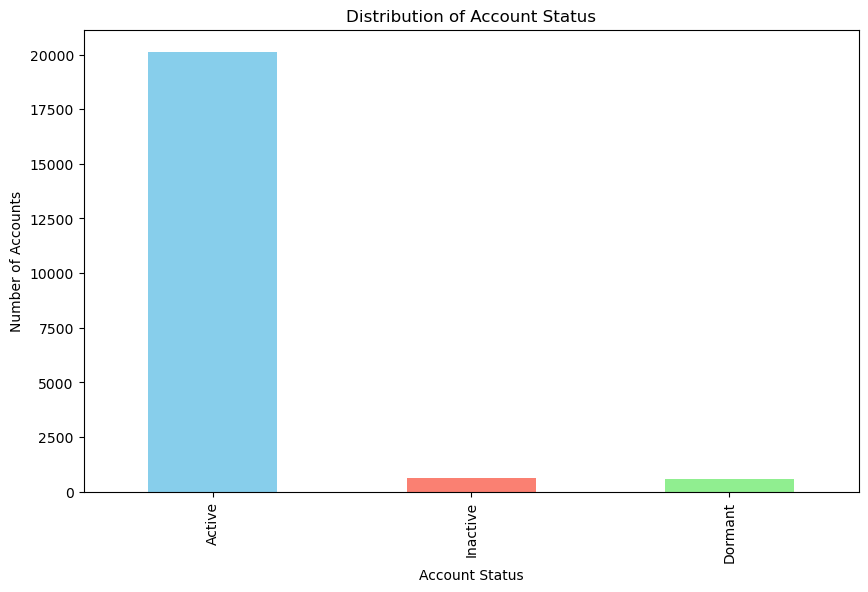

In [51]:
# Distribution of Account Status
account_status_counts = customer_transactions_data['account_status'].value_counts()
plt.figure(figsize=(10, 6))
account_status_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Account Status')
plt.xlabel('Account Status')
plt.ylabel('Number of Accounts')
plt.show()

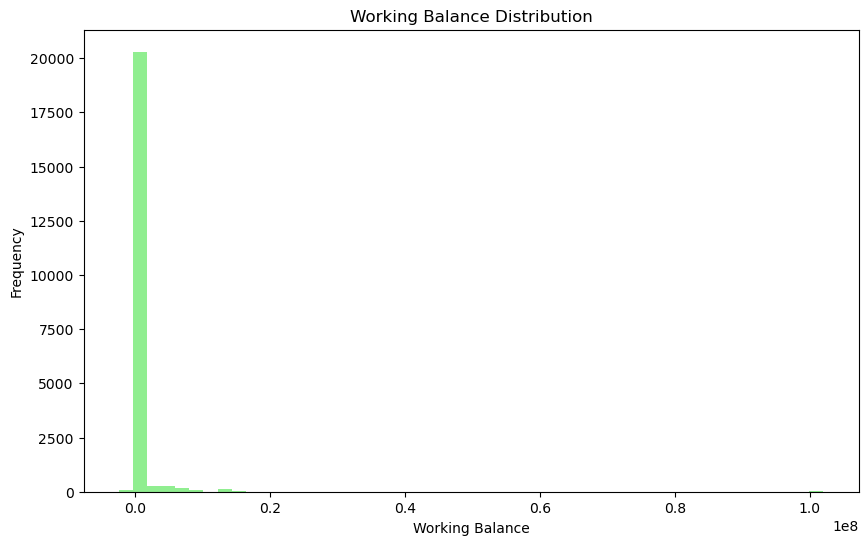

In [52]:
# Working Balance Distribution
plt.figure(figsize=(10, 6))
customer_transactions_data['workingbalance'].plot(kind='hist', bins=50, color='lightgreen')
plt.title('Working Balance Distribution')
plt.xlabel('Working Balance')
plt.ylabel('Frequency')
plt.show()


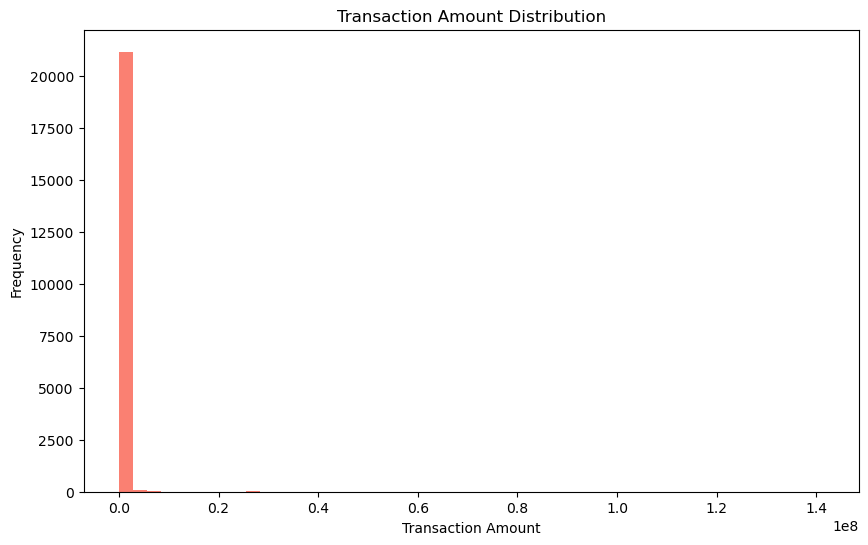

In [60]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
customer_transactions_data['AMOUNT_LCY'].plot(kind='hist', bins=50, color='salmon')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


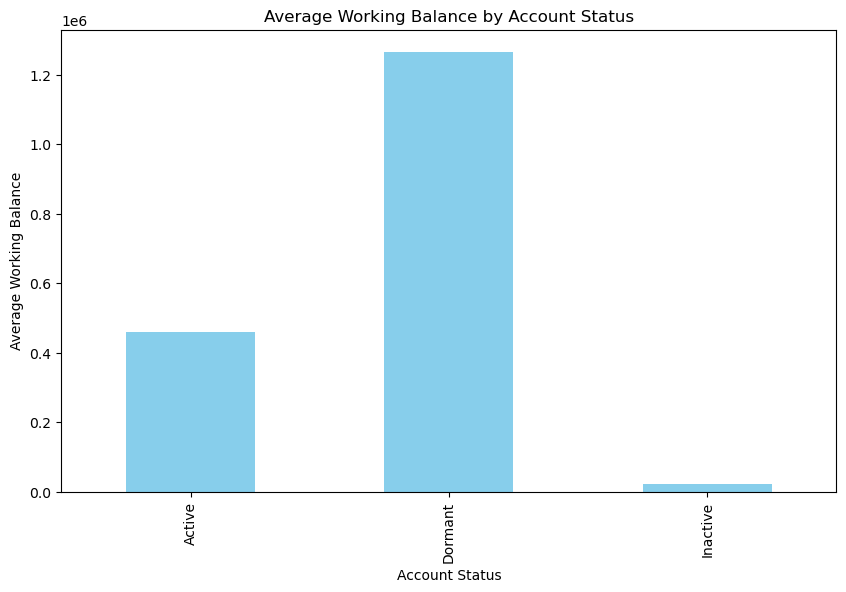

In [53]:
# Average Working Balance by Account Status
average_balance_by_status = customer_transactions_data.groupby('account_status')['workingbalance'].mean()

plt.figure(figsize=(10, 6))
average_balance_by_status.plot(kind='bar', color='skyblue')
plt.title('Average Working Balance by Account Status')
plt.xlabel('Account Status')
plt.ylabel('Average Working Balance')
plt.show()


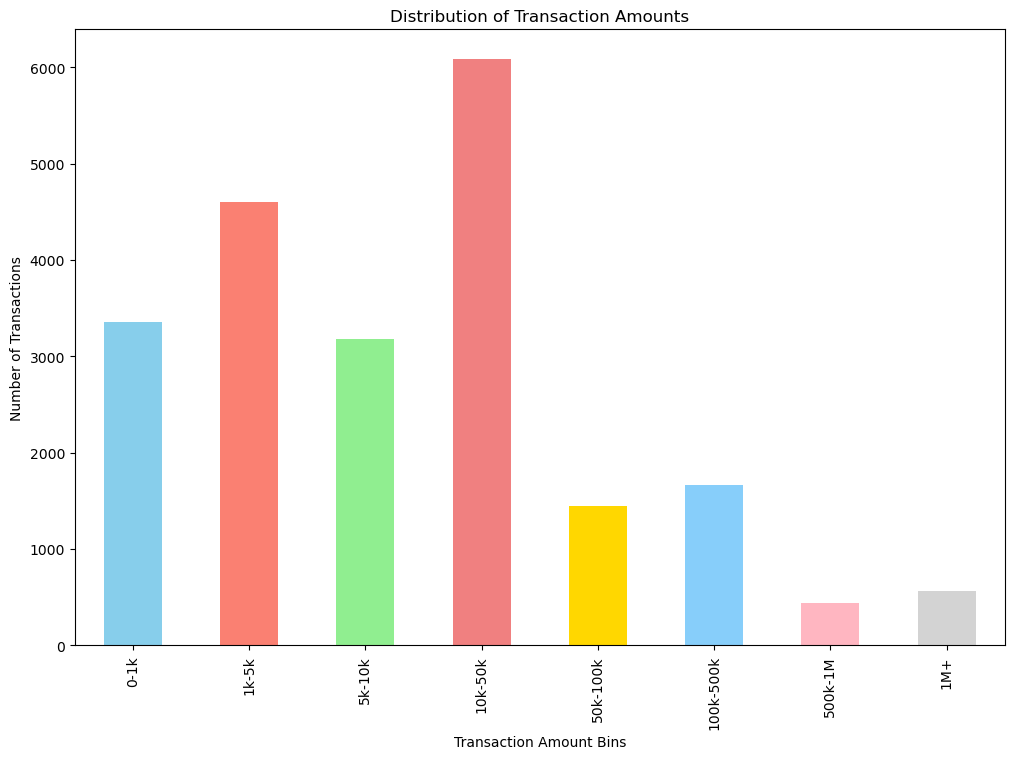

0-1k         3356
1k-5k        4602
5k-10k       3177
10k-50k      6088
50k-100k     1441
100k-500k    1669
500k-1M       440
1M+           560
Name: amount_bin, dtype: int64


In [54]:
# Define the bins for transaction amounts
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, transactions_data_cleaned['AMOUNT_LCY'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M+']

# Bin the transaction amounts
customer_transactions_data['amount_bin'] = pd.cut(customer_transactions_data['AMOUNT_LCY'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = customer_transactions_data['amount_bin'].value_counts().sort_index()

# Define colors for each bin
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'gold', 'lightskyblue', 'lightpink', 'lightgrey']

# Plotting the distribution of transaction amounts by bins
plt.figure(figsize=(12, 8))
amount_bin_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount Bins')
plt.ylabel('Number of Transactions')
plt.show()

# Print the binned data to verify
print(amount_bin_counts)

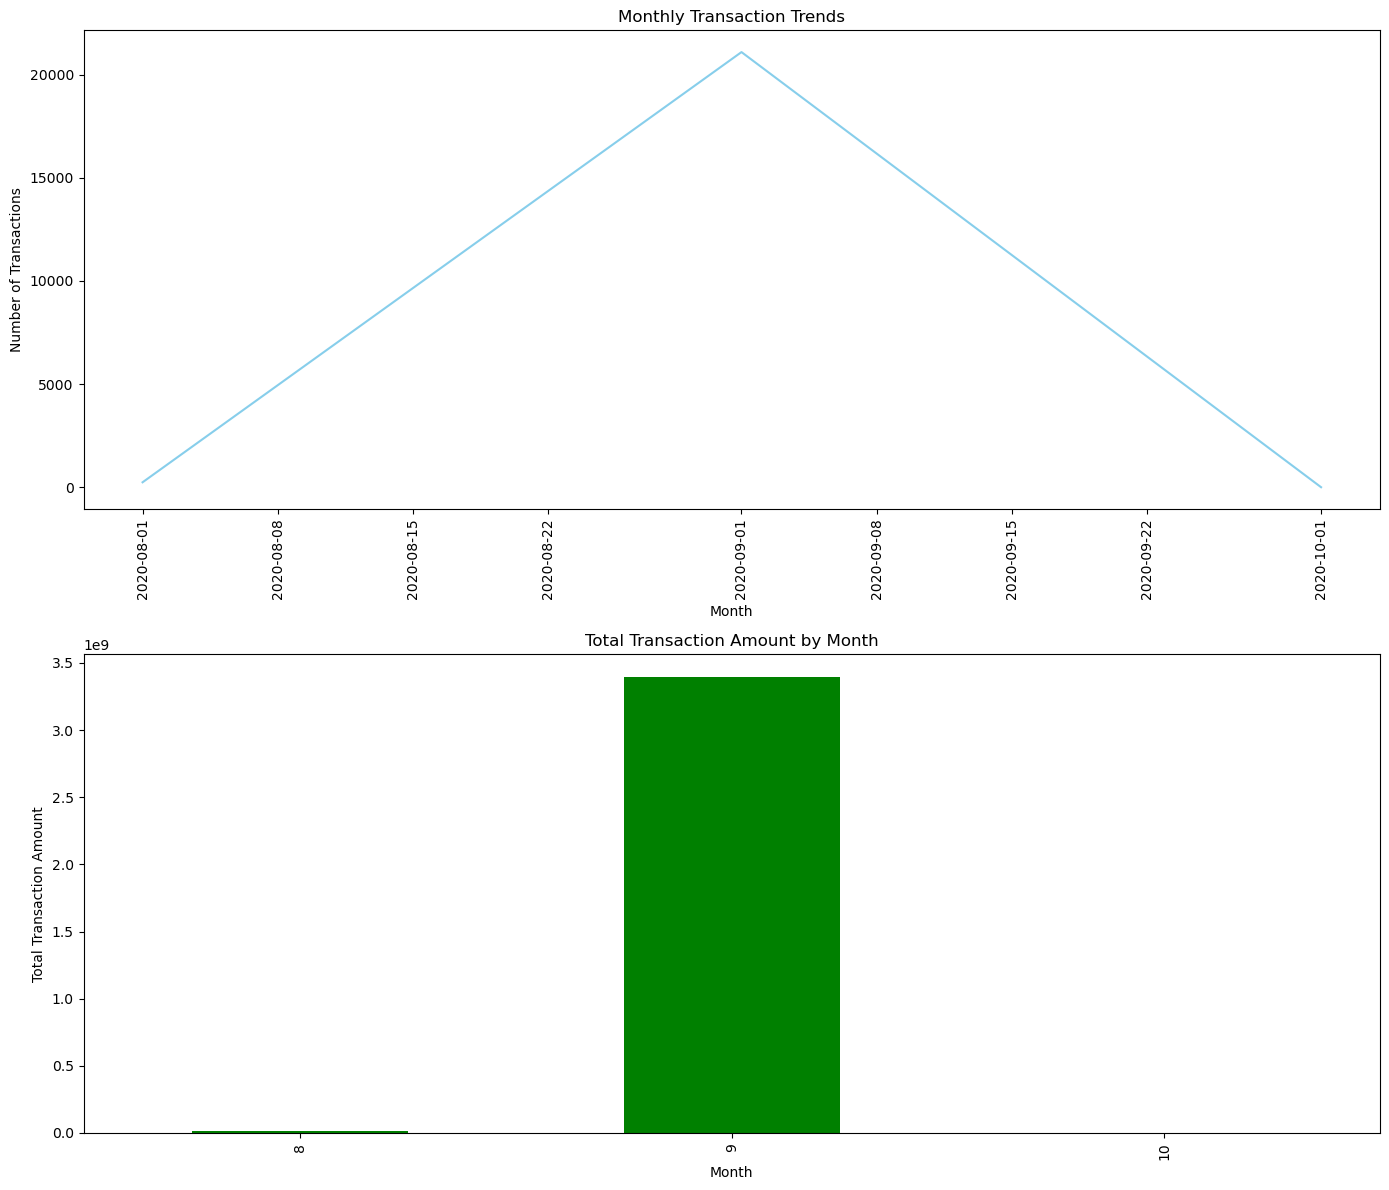

trans_month
8     1.756356e+07
9     3.394535e+09
10    7.772500e+02
Name: AMOUNT_LCY, dtype: float64


In [68]:
# Monthly Transaction Trends
monthly_transactions = customer_transactions_data.groupby(['trans_year', 'trans_month']).size()
monthly_transactions.index = [pd.to_datetime(f'{year}-{month}-01') for year, month in monthly_transactions.index]

# Total Transaction Amount by Month
total_amount_by_month = customer_transactions_data.groupby('trans_month')['AMOUNT_LCY'].sum()

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot Monthly Transaction Trends (Line chart)
axes[0].plot(monthly_transactions.index, monthly_transactions.values, color='skyblue')
axes[0].set_title('Monthly Transaction Trends')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Transactions')
axes[0].tick_params(axis='x', rotation=90)

# Plot Total Transaction Amount by Month (Bar chart)
total_amount_by_month.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title('Total Transaction Amount by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Transaction Amount')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the binned data to verify
print(total_amount_by_month)


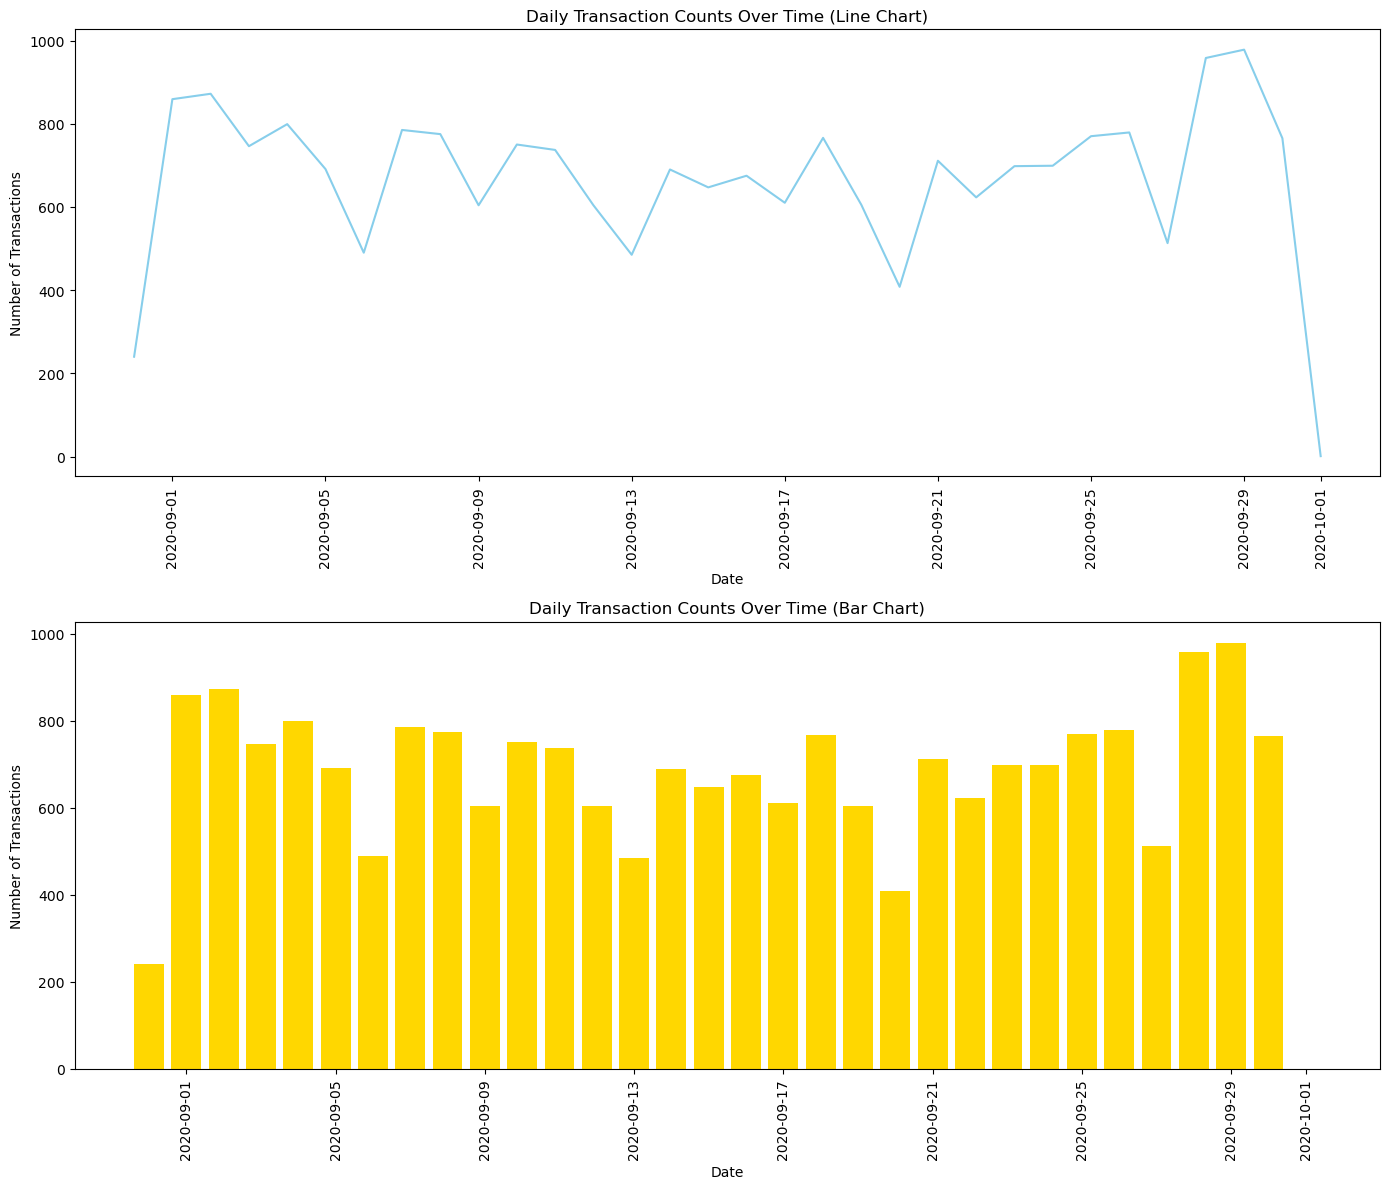

Trans_timestamp
2020-08-31    240
2020-09-01    859
2020-09-02    872
2020-09-03    746
2020-09-04    799
2020-09-05    691
2020-09-06    490
2020-09-07    785
2020-09-08    775
2020-09-09    604
2020-09-10    750
2020-09-11    737
2020-09-12    604
2020-09-13    485
2020-09-14    690
2020-09-15    647
2020-09-16    675
2020-09-17    610
2020-09-18    766
2020-09-19    605
2020-09-20    408
2020-09-21    711
2020-09-22    623
2020-09-23    698
2020-09-24    699
2020-09-25    770
2020-09-26    779
2020-09-27    513
2020-09-28    958
2020-09-29    978
2020-09-30    765
2020-10-01      1
Freq: D, dtype: int64


In [63]:
# Ensure the Trans_timestamp column is in datetime format
customer_transactions_data['Trans_timestamp'] = pd.to_datetime(customer_transactions_data['Trans_timestamp'])

# Aggregate the transaction counts by day
daily_transaction_counts = customer_transactions_data.set_index('Trans_timestamp').resample('D').size()

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot the transaction counts over time (Line chart)
axes[0].plot(daily_transaction_counts.index, daily_transaction_counts.values, color='skyblue')
axes[0].set_title('Daily Transaction Counts Over Time (Line Chart)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Transactions')
axes[0].tick_params(axis='x', rotation=90)

# Plot the transaction counts over time (Bar chart)
axes[1].bar(daily_transaction_counts.index, daily_transaction_counts.values, color='gold')
axes[1].set_title('Daily Transaction Counts Over Time (Bar Chart)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the data to verify
print(daily_transaction_counts)


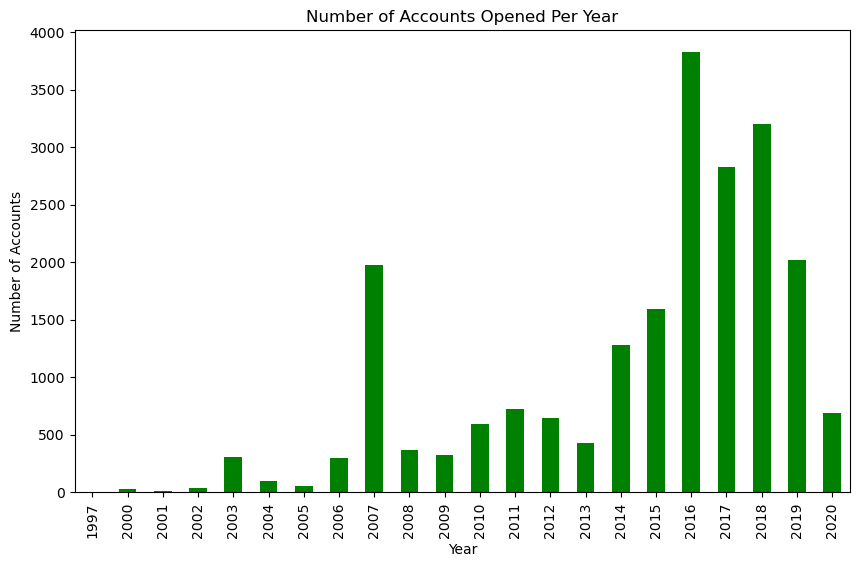

1997       2
2000      28
2001       8
2002      41
2003     308
2004     100
2005      51
2006     298
2007    1979
2008     368
2009     322
2010     596
2011     725
2012     644
2013     428
2014    1279
2015    1591
2016    3826
2017    2831
2018    3200
2019    2023
2020     685
Name: year, dtype: int64


In [64]:
# Count the number of accounts opened in each year
yearly_accounts = customer_transactions_data['year'].value_counts().sort_index()

# Plotting the number of accounts opened per year
plt.figure(figsize=(10, 6))
yearly_accounts.plot(kind='bar', color='green')
plt.title('Number of Accounts Opened Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.show()

# Print the data to verify
print(yearly_accounts)

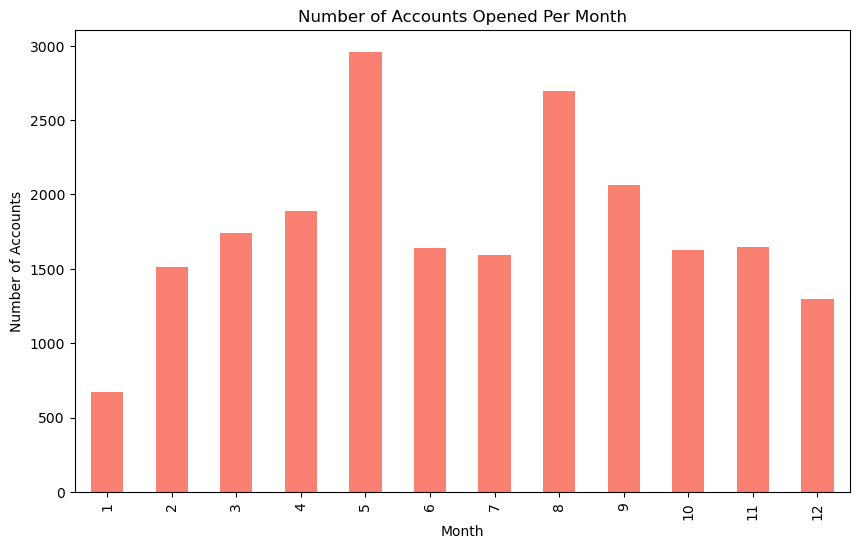

In [65]:
# Count the number of accounts opened in each month
monthly_accounts = customer_transactions_data['month'].value_counts().sort_index()

# Plotting the number of accounts opened per month
plt.figure(figsize=(10, 6))
monthly_accounts.plot(kind='bar', color='salmon')
plt.title('Number of Accounts Opened Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accounts')
plt.show()

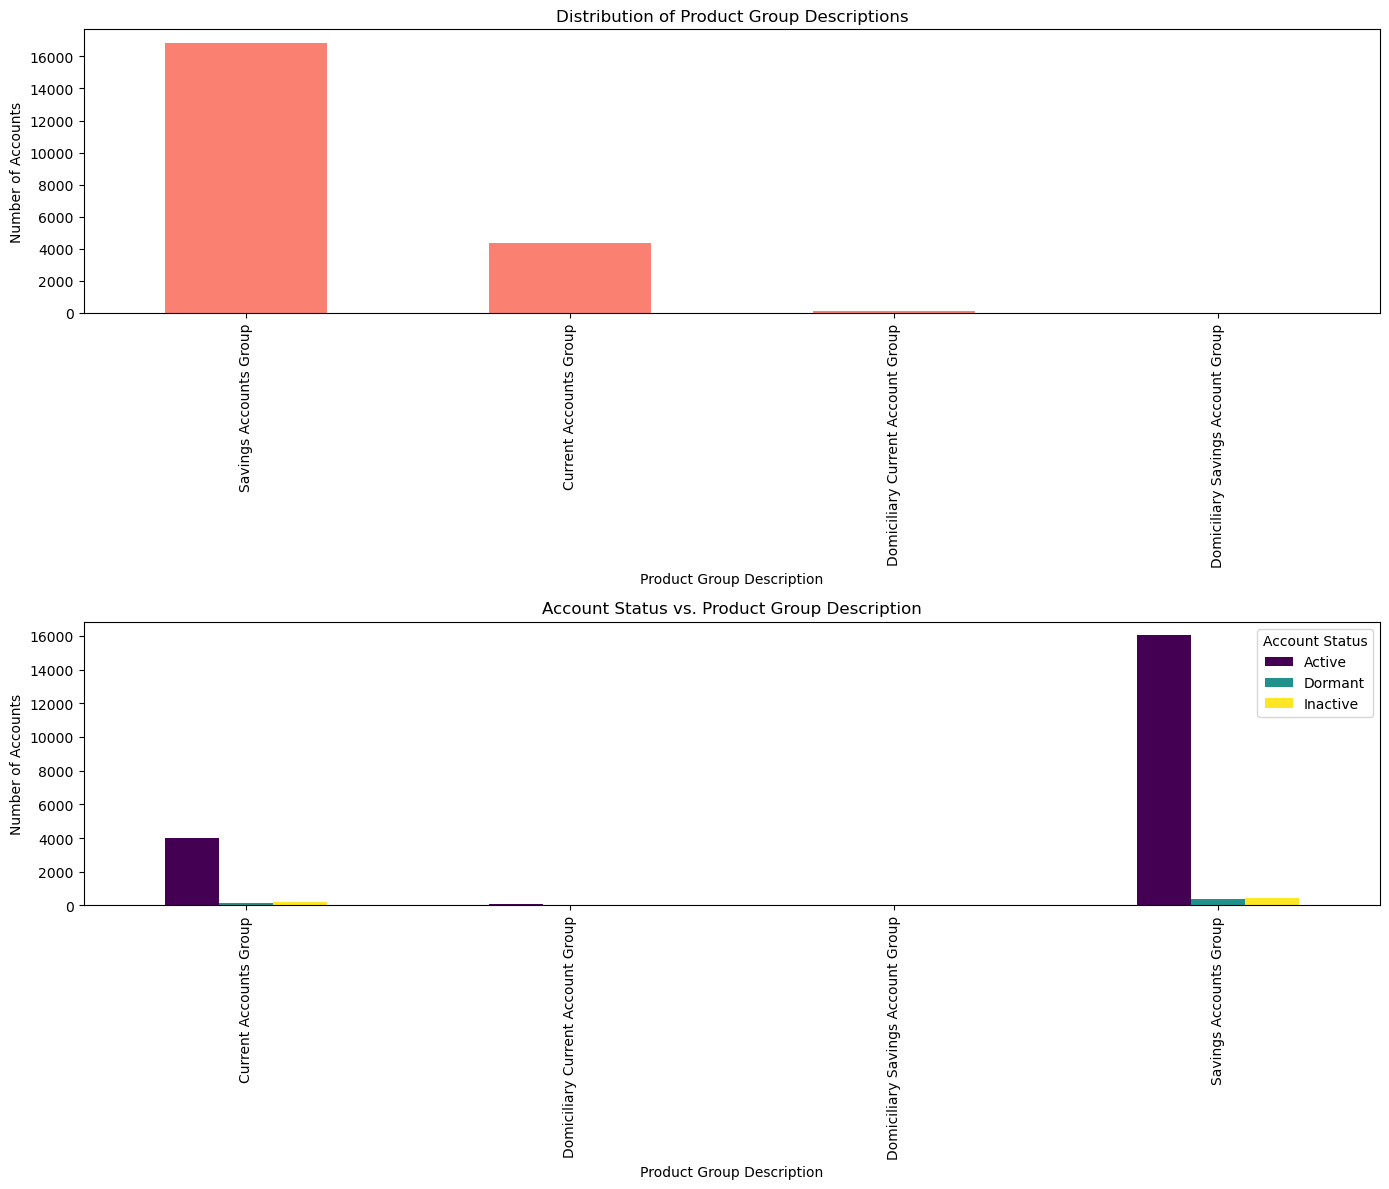

In [67]:
# Distribution of Product Group Descriptions
product_group_counts = customer_transactions_data['product_group_desc'].value_counts()

# Account Status vs. Product Group Description
account_status_product_group = customer_transactions_data.groupby(['product_group_desc', 'account_status']).size().unstack().fillna(0)

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot Distribution of Product Group Descriptions (Bar chart)
product_group_counts.plot(kind='bar', color='salmon', ax=axes[0])
axes[0].set_title('Distribution of Product Group Descriptions')
axes[0].set_xlabel('Product Group Description')
axes[0].set_ylabel('Number of Accounts')

# Plot Account Status vs. Product Group Description (Bar chart)
account_status_product_group.plot(kind='bar', colormap='viridis', ax=axes[1])
axes[1].set_title('Account Status vs. Product Group Description')
axes[1].set_xlabel('Product Group Description')
axes[1].set_ylabel('Number of Accounts')
axes[1].legend(title='Account Status')

# Adjust layout
plt.tight_layout()
plt.show()


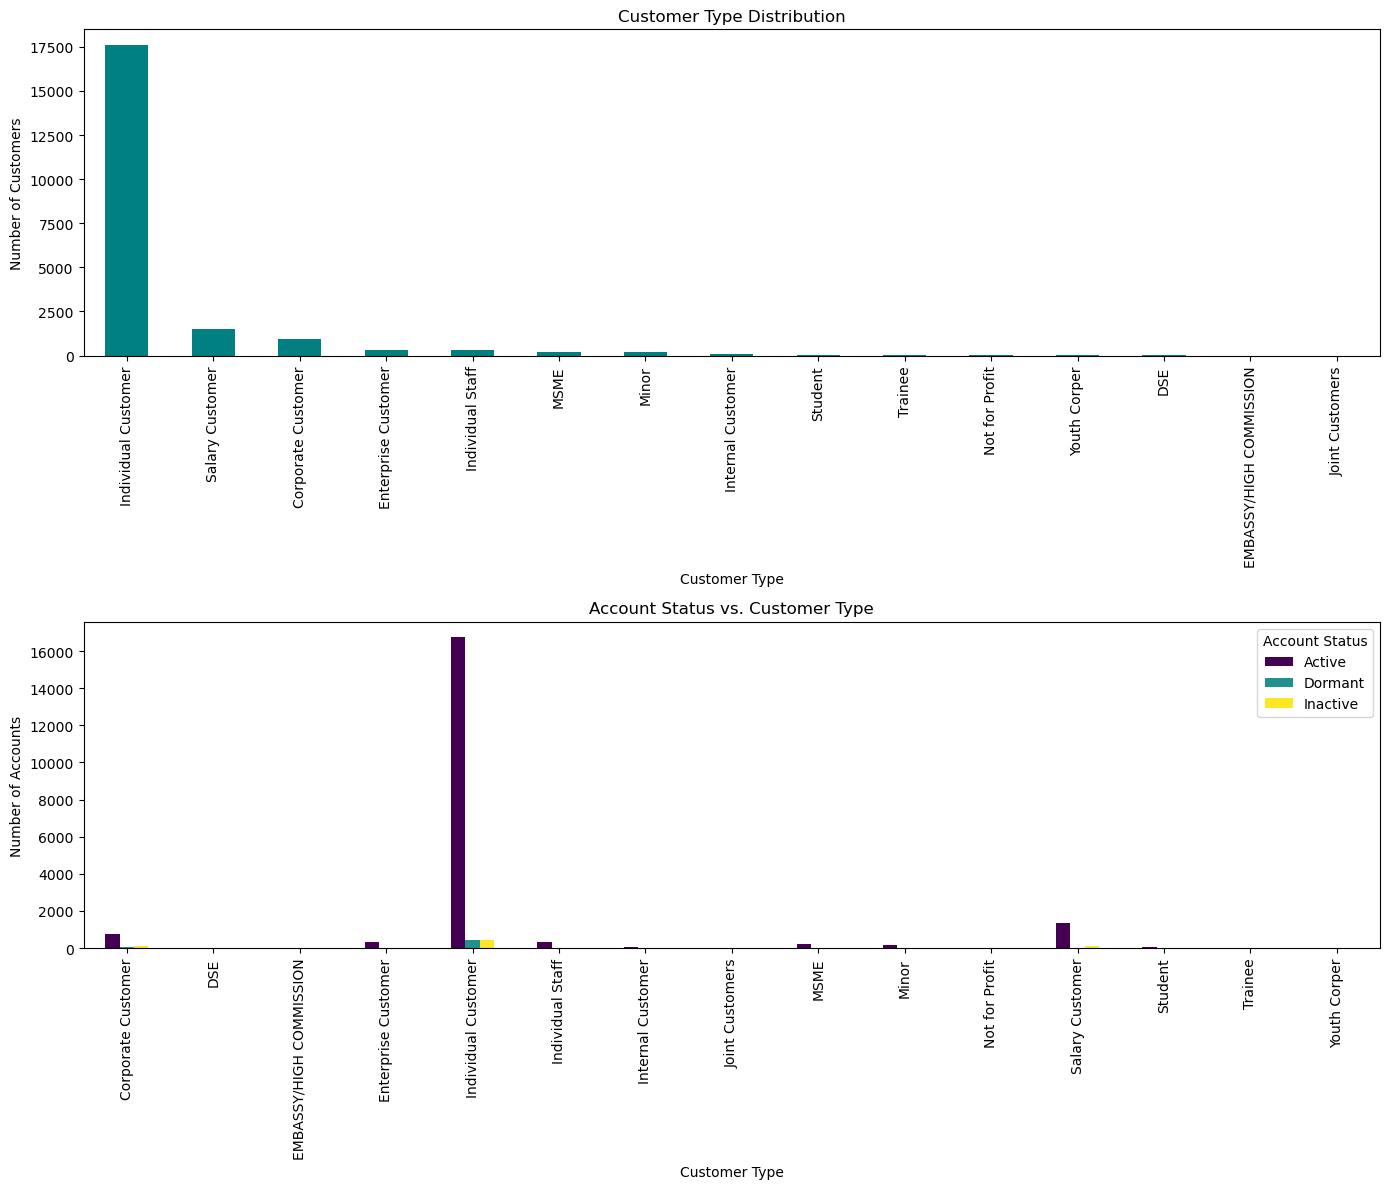

In [73]:
# Customer Type Distribution
customer_type_counts = customer_transactions_data['customer_type'].value_counts()

# Account Status vs. Customer Type
account_status_customer_type = customer_transactions_data.groupby(['customer_type', 'account_status']).size().unstack().fillna(0)

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot Customer Type Distribution (Bar chart)
customer_type_counts.plot(kind='bar', color='teal', ax=axes[0])
axes[0].set_title('Customer Type Distribution')
axes[0].set_xlabel('Customer Type')
axes[0].set_ylabel('Number of Customers')

# Plot Account Status vs. Customer Type (Bar chart)
account_status_customer_type.plot(kind='bar', colormap='viridis', ax=axes[1])
axes[1].set_title('Account Status vs. Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Accounts')
axes[1].legend(title='Account Status')

# Adjust layout
plt.tight_layout()
plt.show()


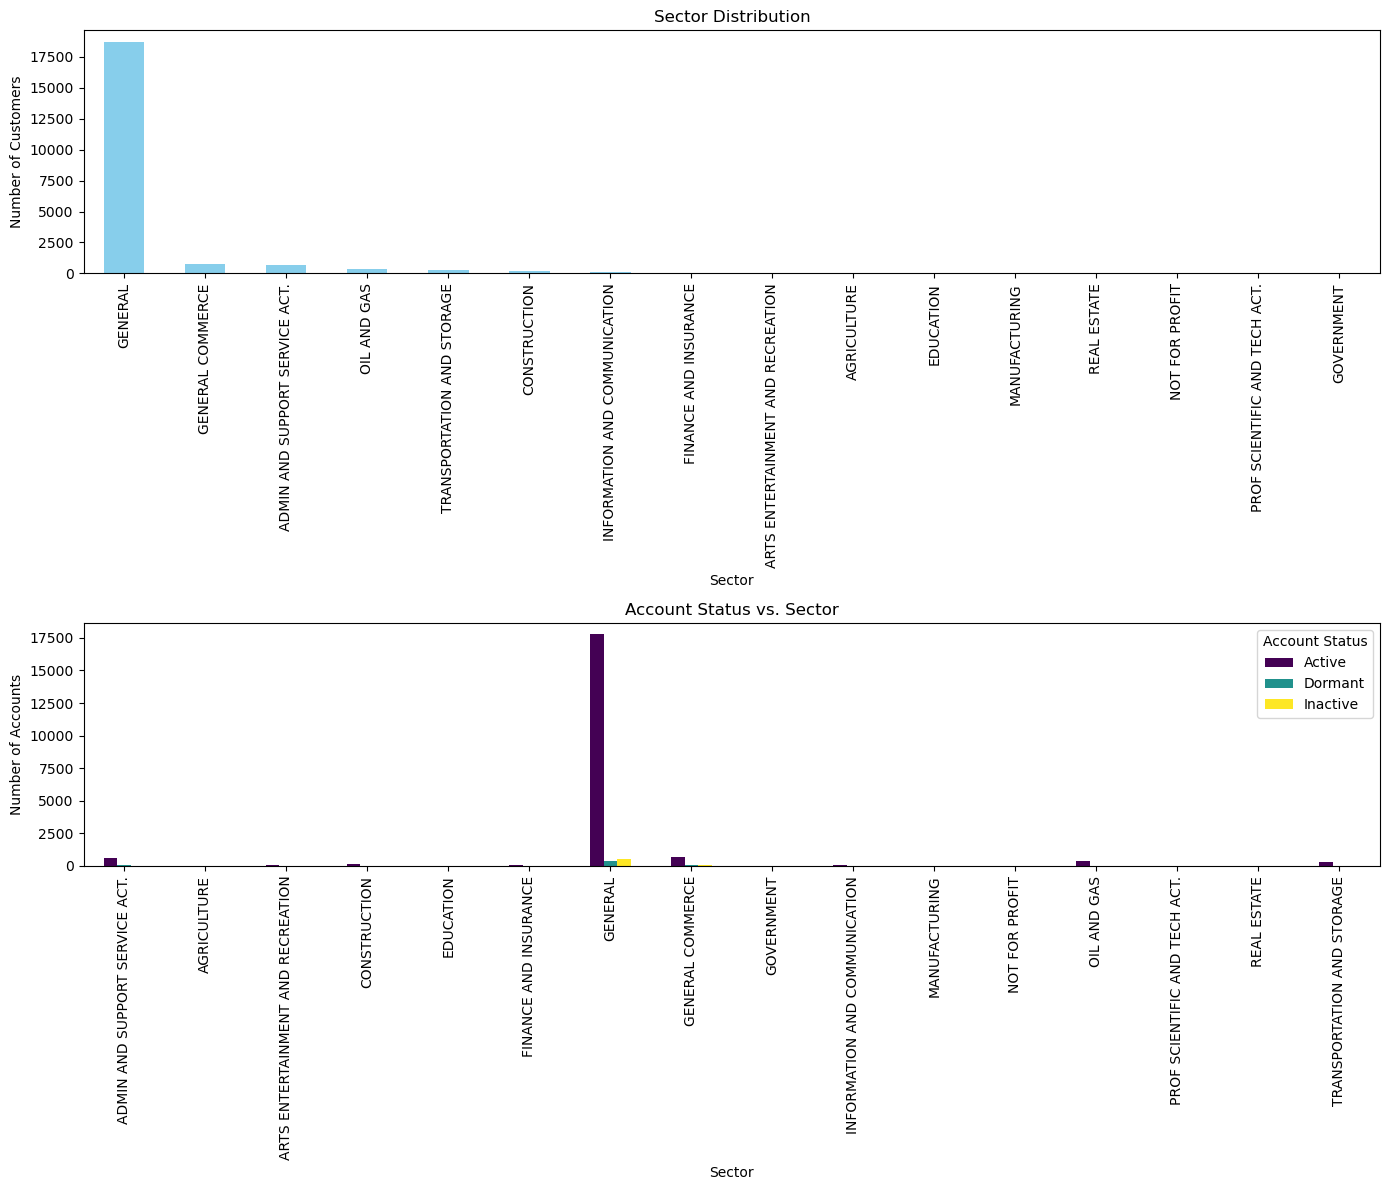

In [78]:
# Sector Distribution
sector_counts = customer_transactions_data['sector'].value_counts()

# Account Status vs. Sector
account_status_sector = customer_transactions_data.groupby(['sector', 'account_status']).size().unstack().fillna(0)

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot Sector Distribution (Bar chart)
sector_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Sector Distribution')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Number of Customers')

# Plot Account Status vs. Sector (Bar chart)
account_status_sector.plot(kind='bar', colormap='viridis', ax=axes[1])
axes[1].set_title('Account Status vs. Sector')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Number of Accounts')
axes[1].legend(title='Account Status')

# Adjust layout
plt.tight_layout()
plt.show()


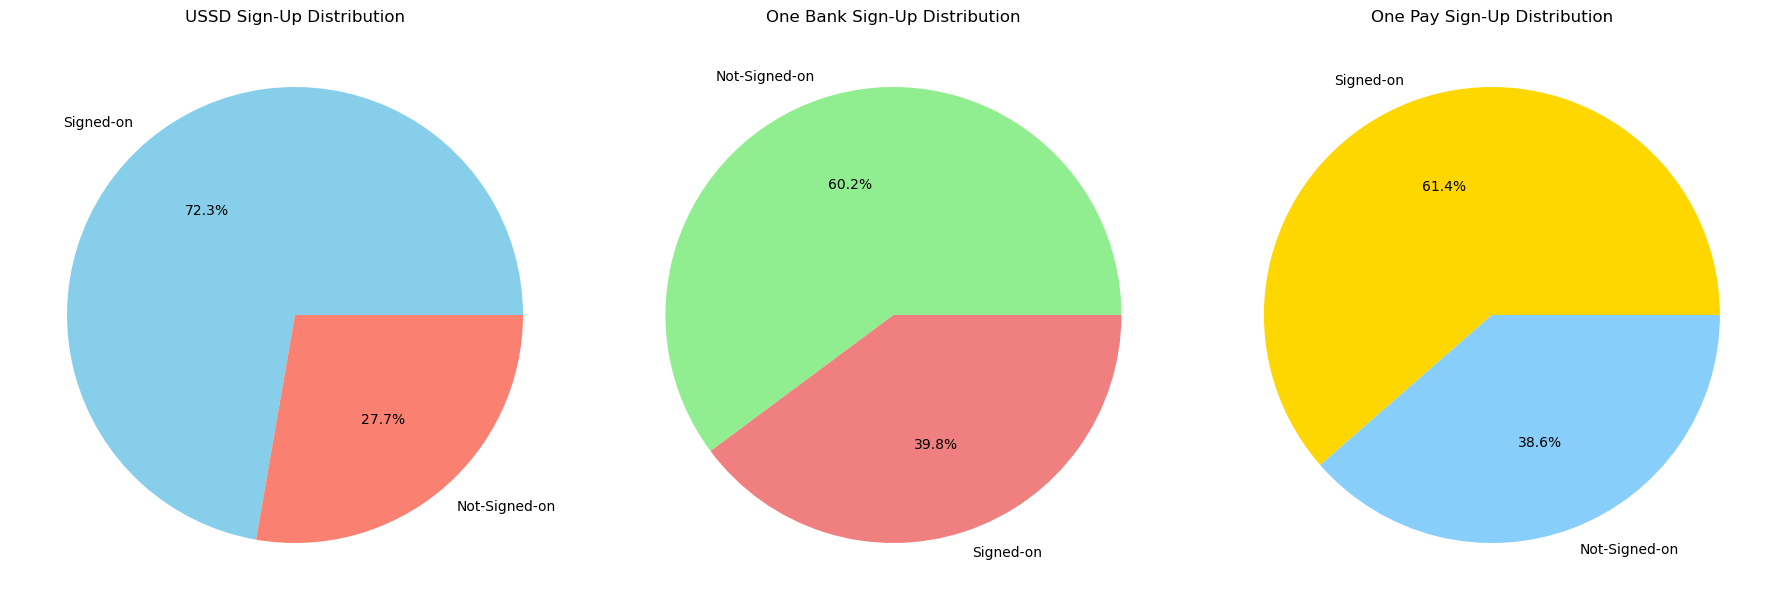

In [80]:
# Calculate the distribution of customers signed on to each service
ussd_counts = customer_transactions_data['ussd'].value_counts()
onebank_counts = customer_transactions_data['onebank'].value_counts()
onepay_counts = customer_transactions_data['onepay'].value_counts()

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for USSD
axes[0].pie(ussd_counts, labels=ussd_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('USSD Sign-Up Distribution')

# Pie chart for One Bank
axes[1].pie(onebank_counts, labels=onebank_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1].set_title('One Bank Sign-Up Distribution')

# Pie chart for One Pay
axes[2].pie(onepay_counts, labels=onepay_counts.index, autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
axes[2].set_title('One Pay Sign-Up Distribution')

# Show the plot
plt.tight_layout()
plt.show()


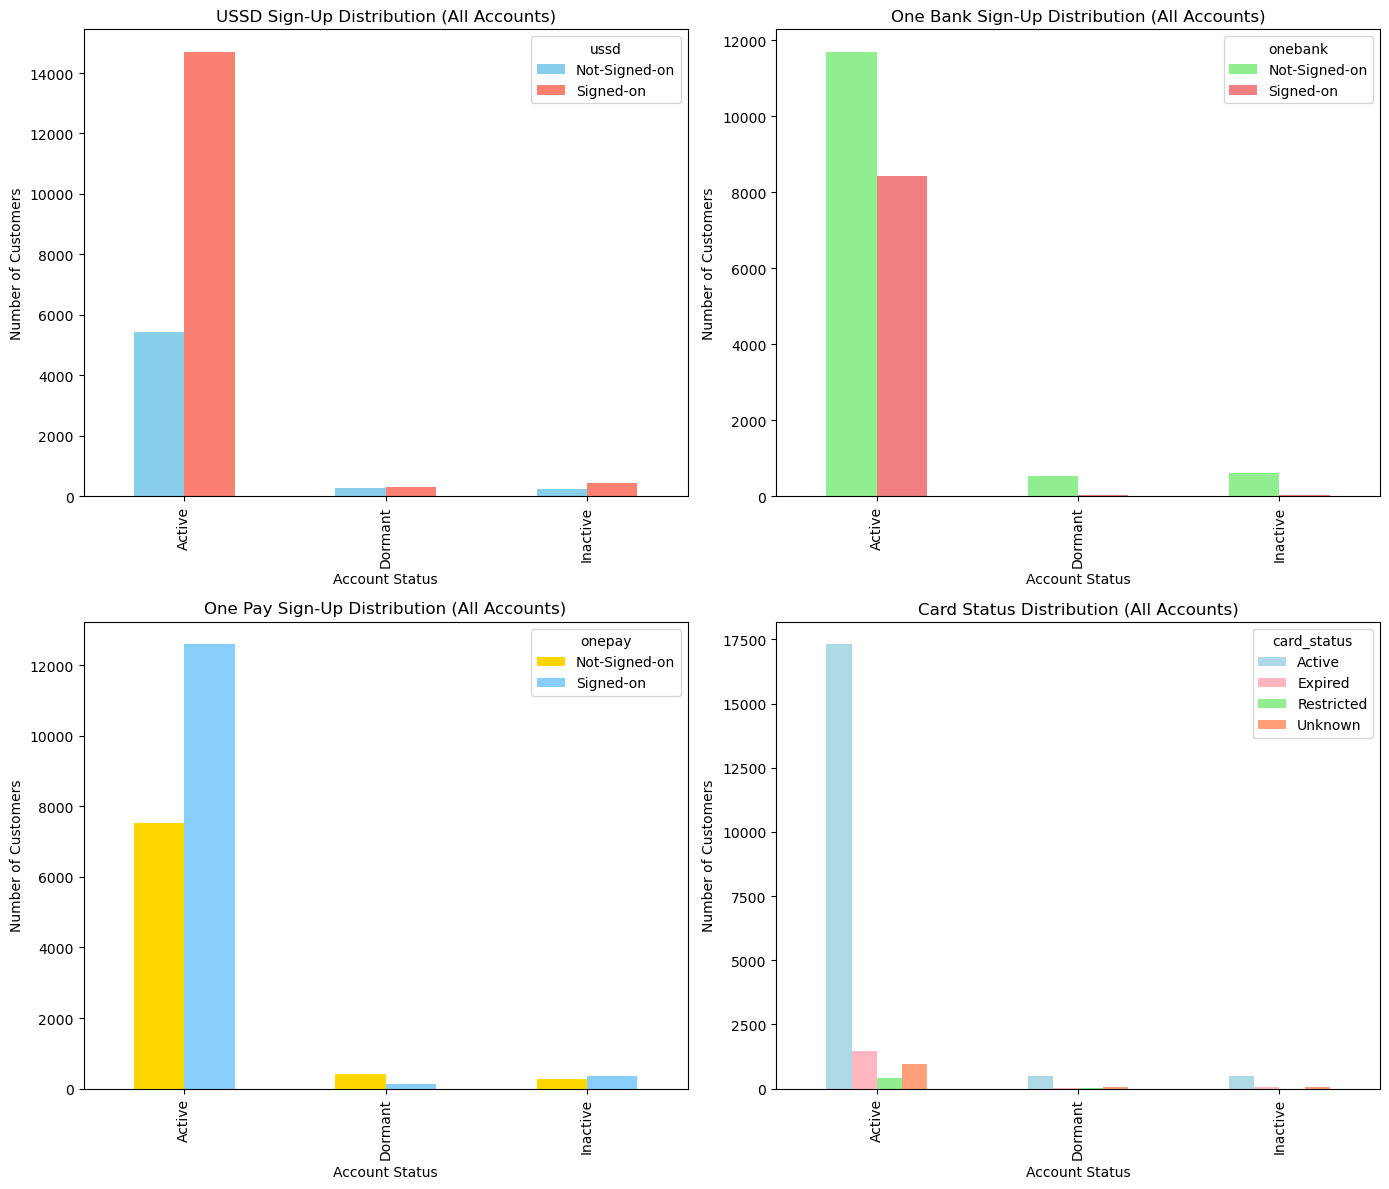

In [81]:
# Calculate the distribution of USSD, One Bank, One Pay, and card status for all account statuses
ussd_counts = customer_transactions_data.groupby(['account_status', 'ussd']).size().unstack().fillna(0)
onebank_counts = customer_transactions_data.groupby(['account_status', 'onebank']).size().unstack().fillna(0)
onepay_counts = customer_transactions_data.groupby(['account_status', 'onepay']).size().unstack().fillna(0)
card_status_counts = customer_transactions_data.groupby(['account_status', 'card_status']).size().unstack().fillna(0)

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Bar chart for USSD (All Accounts)
ussd_counts.plot(kind='bar', stacked=False, ax=axes[0, 0], color=['skyblue', 'salmon'])
axes[0, 0].set_title('USSD Sign-Up Distribution (All Accounts)')
axes[0, 0].set_xlabel('Account Status')
axes[0, 0].set_ylabel('Number of Customers')

# Bar chart for One Bank (All Accounts)
onebank_counts.plot(kind='bar', stacked=False, ax=axes[0, 1], color=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('One Bank Sign-Up Distribution (All Accounts)')
axes[0, 1].set_xlabel('Account Status')
axes[0, 1].set_ylabel('Number of Customers')

# Bar chart for One Pay (All Accounts)
onepay_counts.plot(kind='bar', stacked=False, ax=axes[1, 0], color=['gold', 'lightskyblue'])
axes[1, 0].set_title('One Pay Sign-Up Distribution (All Accounts)')
axes[1, 0].set_xlabel('Account Status')
axes[1, 0].set_ylabel('Number of Customers')

# Bar chart for Card Status (All Accounts)
card_status_counts.plot(kind='bar', stacked=False, ax=axes[1, 1], color=['lightblue', 'lightpink', 'lightgreen', 'lightsalmon'])
axes[1, 1].set_title('Card Status Distribution (All Accounts)')
axes[1, 1].set_xlabel('Account Status')
axes[1, 1].set_ylabel('Number of Customers')

# Show the plot
plt.tight_layout()
plt.show()

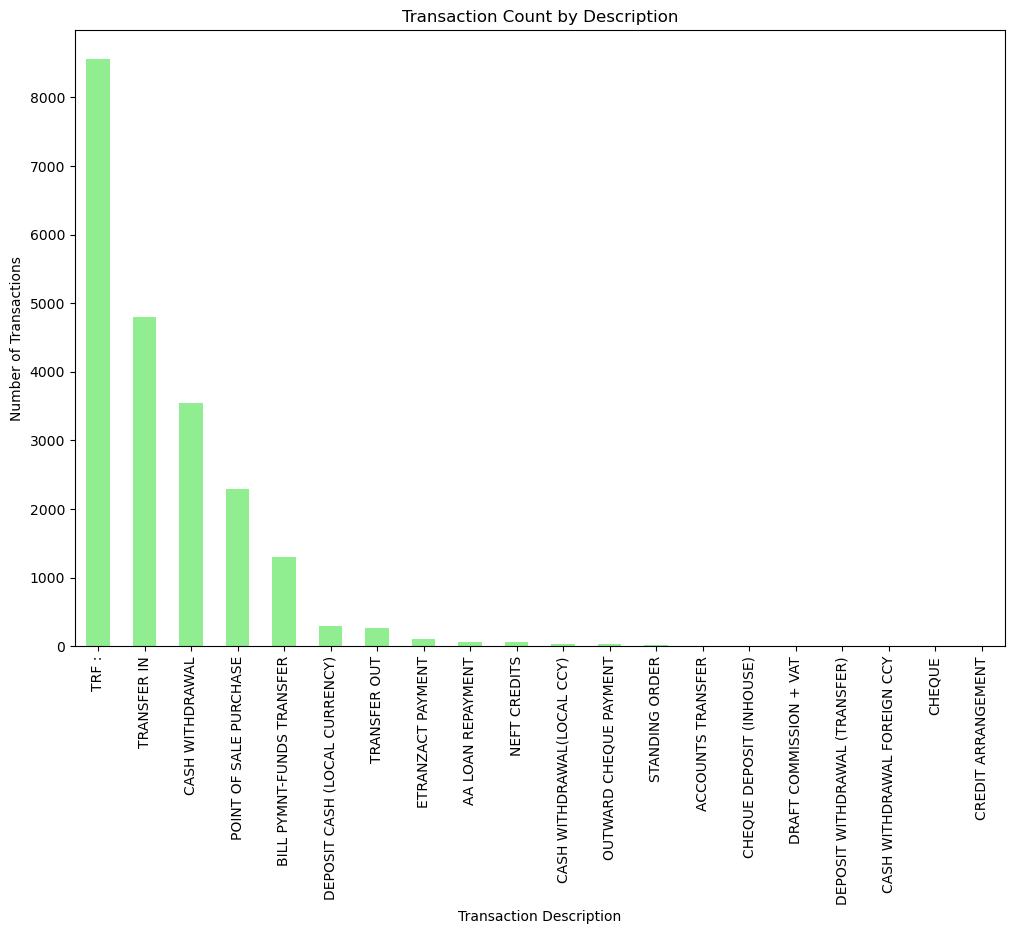

In [82]:
# Transaction Count by Description
transaction_count_by_description = customer_transactions_data['transactiondescription'].value_counts()

plt.figure(figsize=(12, 8))
transaction_count_by_description.plot(kind='bar', color='lightgreen')
plt.title('Transaction Count by Description')
plt.xlabel('Transaction Description')
plt.ylabel('Number of Transactions')
plt.show()

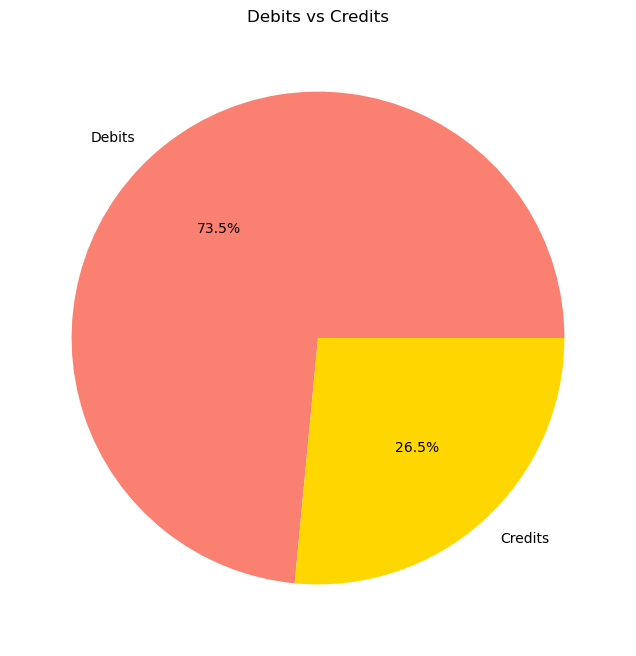

In [84]:
# Calculate the distribution of debits and credits
deb_cre_counts = customer_transactions_data['deb_cre_ind'].value_counts()

# Pie chart for Debits vs Credits
plt.figure(figsize=(8, 8))
deb_cre_counts.plot(kind='pie', labels=['Debits', 'Credits'], autopct='%1.1f%%', colors=['salmon', 'gold'])
plt.title('Debits vs Credits')
plt.ylabel('')
plt.show()